<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-Isaias-Hernandez/blob/main/Sep1-2/Ejercicio_2_septiembre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style()

In [ ]:
def L(x,y,w):
    f = w[0] + w[1]*x[0,:] + w[2]*x[1,:] + w[3]*x[2,:]+w[4]*x[3,:]
    costo= np.sum((f-y)**2)
    costo/=(2*len(x[0,:]))
    return costo

In [ ]:
def D(x,y,w):
    dw = np.zeros(len(w))
    f=0
    for i in range(len(w)):
        if i== 0:
            f = w[0]
        else:
            f += w[i]*x[i-1,:]
        for j in range(len(w)):
            if i== 0:
                dw[0] = np.sum((f-y))/len(x)
            else:
                dw[j] = np.sum((f-y)*x[j-1,:])/len(x)
    return dw

In [ ]:
def graddec(x,y,w,alph,iter,V,D):
    cost=[]
    for i in range(iter):
        dj=D(x,y,w)
        for j in range(len(w)):
            w[j] = w[j]-alph*dj[j]
        cost.append(V(x,y,w))
    return w, cost

* Explora los datos, realiza gráficas del costo de las casas como función de cada característica.
* Ajusta un modelo lineal usando todas las caraterísticas, usando el método de gradiente descendiente. Determinar el valor del parámetro de aprendizaje que mejor funciona para este caso.
* Normaliza las caracterpisticas y ajusta un nuevo modelo lineal, nuevamente determina el valor del parámetro de aprendizaje.
* Usa el modelo obtenido para predecir el valor de una casa con las siguientes características:
tamaño=1200,
numero de habitaciones=3,
pisos=1,
años=4

In [ ]:
# ver datos
# graficar de los valores x con t
# Modelo para ajustar las 4 caracteristicas sin normalizar
# Después normalizacion ¿qué cambios hubo?
#, ,habitaciones, años del casa
houses = np.loadtxt("houses.txt", delimiter=',').T
Xh=houses[0:4]
th=houses[-1] #Costo de casa
labels=["Tamaño", "# habitaciones", "pisos", "años"]

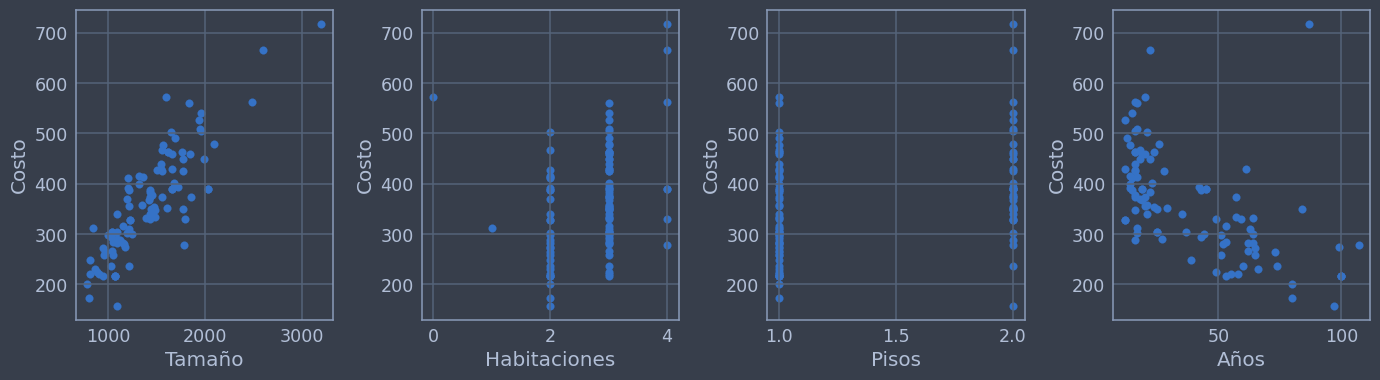

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(14, 4))
axs[0].scatter(Xh[0], th)
#axs[0][0].set_title("Tamaño")
axs[0].set_xlabel('Tamaño')
axs[0].set_ylabel('Costo')

axs[1].scatter(Xh[1], th)
axs[1].set_xlabel('Habitaciones')
axs[1].set_ylabel('Costo')

axs[2].scatter(Xh[2], th)
axs[2].set_xlabel('Pisos')
axs[2].set_ylabel('Costo')

axs[3].scatter(Xh[3], th)
axs[3].set_xlabel('Años')
axs[3].set_ylabel('Costo')
plt.tight_layout()
plt.show()

* Ajusta un modelo lineal usando todas las caraterísticas, usando el método de gradiente descendiente. Determinar el valor del parámetro de aprendizaje que mejor funciona para este caso.
$$
    L = \frac{1}{2N} \sum (w_{0}+w_1 x_1 + w_2 x_2 + w_3 x_3 + w_4 x_4 - t_i)**2
$$



In [ ]:
w=[0.,0.,0.,0.,0.]
iteraciones = 20000
alph=1e-10
wf, cost = graddec(Xh,th,w, alph, iteraciones, L,D)
wf

[-0.02584719484163203,
 0.253732548980683,
 0.00014964052608183536,
 -0.00016749372161948254,
 -0.02584719484163203]

1549.1577256958976


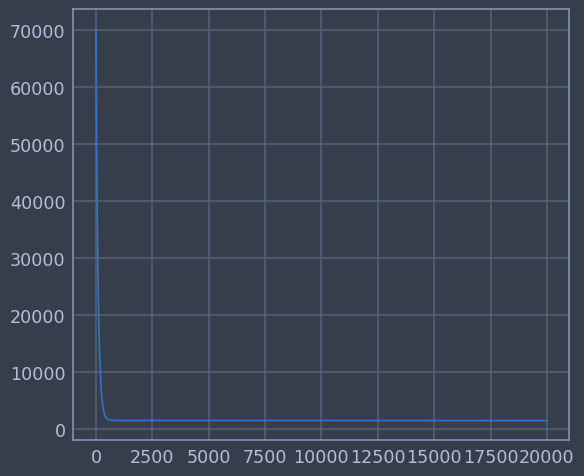

In [ ]:
print(np.min(cost))
plt.plot(range(iteraciones), cost)

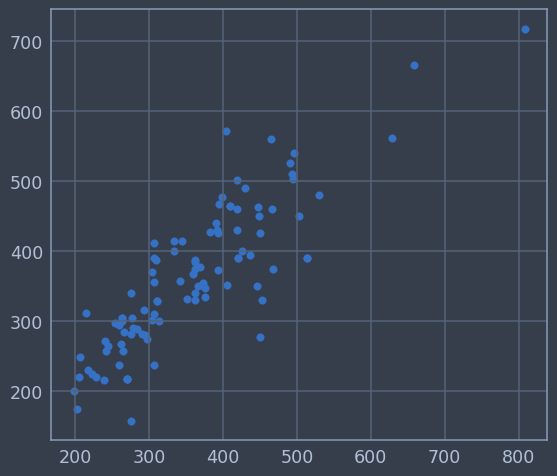

In [ ]:
f = wf[0] + wf[1]*Xh[0,:] + wf[2]*Xh[1,:] + wf[3]*Xh[2,:]+wf[4]*Xh[3,:]

plt.scatter(f, th)

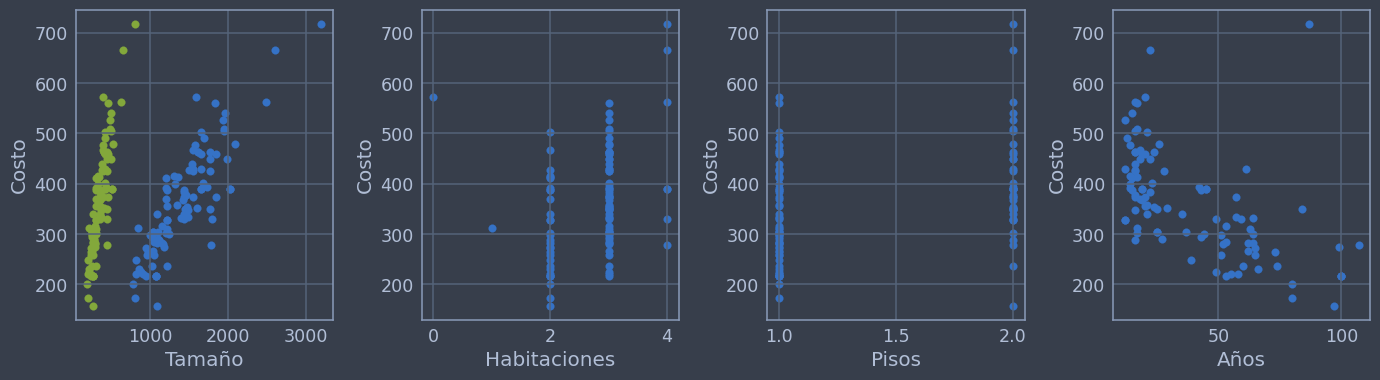

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(14, 4))
axs[0].scatter(Xh[0], th)
axs[0].scatter(f, th)
#axs[0][0].set_title("Tamaño")
axs[0].set_xlabel('Tamaño')
axs[0].set_ylabel('Costo')

axs[1].scatter(Xh[1], th)
axs[1].set_xlabel('Habitaciones')
axs[1].set_ylabel('Costo')

axs[2].scatter(Xh[2], th)
axs[2].set_xlabel('Pisos')
axs[2].set_ylabel('Costo')

axs[3].scatter(Xh[3], th)
#axs[3].scatter(, th)
axs[3].set_xlabel('Años')
axs[3].set_ylabel('Costo')
plt.tight_layout()
plt.show()

* Normaliza las caracterpisticas y ajusta un nuevo modelo lineal, nuevamente determina el valor del parámetro de aprendizaje.

In [ ]:

#Normalizar como x_n = (x-mu)/sigma
X_est = np.ones_like(Xh[1])
print(np.shape(X_est))
for i in range(np.shape(Xh)[0]):
    mu = np.mean(Xh[i])
    sig = np.std(Xh[i])
    x_est = (Xh[i] - mu)/sig
    X_est = np.vstack((X_est, x_est))

#np.shape(Xh)
np.shape(X_est)

(100,)


(5, 100)